In [1]:
import numpy as np
import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FlipFlopGenerator
import matplotlib.pyplot as plt
import time

# Flip Flop

In [2]:
# Define optimization problem object
problem_no_fit = FlipFlopGenerator().generate(seed=12345, size=20)

## 	randomized hill climbing

In [3]:
best_state_HC, best_fitness_HC, fitness_curve_HC = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=0, 
                                                                         init_state=None, curve=True, random_state=42)

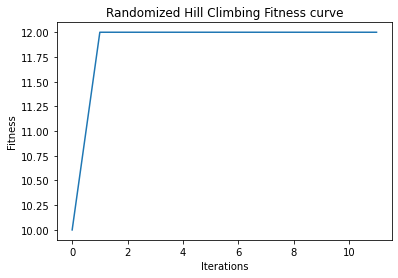

In [4]:
plt.plot(range(0,len(list(fitness_curve_HC))),fitness_curve_HC[...,0],'-')
plt.title("Randomized Hill Climbing Fitness curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()

In [5]:
# 调restart
best_state_HC5, best_fitness_HC5, fitness_curve_HC5 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=5, 
                                                                         init_state=None, curve=True, random_state=2)
best_state_HC10, best_fitness_HC10, fitness_curve_HC10 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=10, 
                                                                         init_state=None, curve=True, random_state=4)

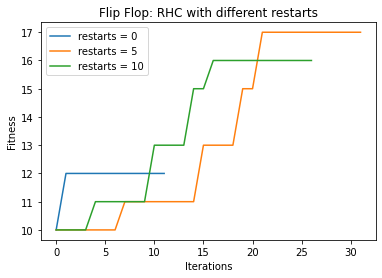

In [6]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_HC))),fitness_curve_HC[...,0],'-',label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_HC5))),fitness_curve_HC5[...,0],'-',label='restarts = 5')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_HC10))),fitness_curve_HC10[...,0],'-',label='restarts = 10')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Flip Flop: RHC with different restarts")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [7]:
# restarts = 10 wins

## 	simulated annealing

In [50]:
# Solve using simulated annealing - attempt 1
schedule_SA = mlrose_hiive.GeomDecay(init_temp=1, decay=0.95, min_temp=0.1)
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose_hiive.simulated_annealing(problem_no_fit, schedule=schedule_SA, 
                                                                              max_attempts=10, max_iters=1000, init_state=None, 
                                                                              curve=True, random_state=42)

#print(fitness_curve)

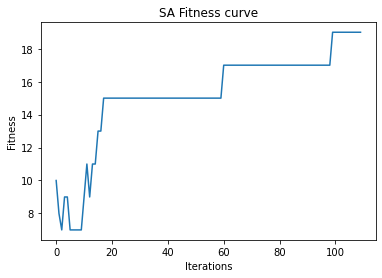

In [51]:
plt.plot(range(0,len(list(fitness_curve_SA))),fitness_curve_SA[...,0],'-')
plt.title("SA Fitness curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()

In [52]:
# tune temperature
schedule_arith =mlrose_hiive.ArithDecay(init_temp=1, decay=0.95, min_temp=0.1)
best_state_SAarith, best_fitness_SAarith, fitness_curve_SAarith = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 1)

In [53]:
schedule_exp =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.95, min_temp=0.1)
best_state_SAexp, best_state_SAexp, fitness_curve_SAexp = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)

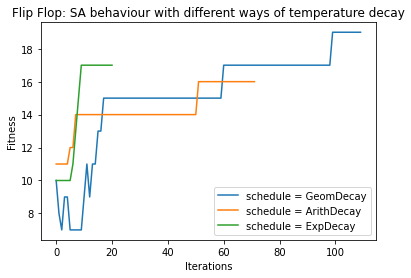

In [54]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SA))),fitness_curve_SA[...,0],'-',label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SAarith))),fitness_curve_SAarith[...,0],'-',label='schedule = ArithDecay')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_SAexp))),fitness_curve_SAexp[...,0],'-',label='schedule = ExpDecay')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Flip Flop: SA behaviour with different ways of temperature decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [13]:
# arithdecay  wins, then start to explore

In [55]:
# tune temperature decay

schedule_GD2 = mlrose_hiive.GeomDecay(init_temp=1, decay=0.5, min_temp=0.1)
best_state_GD2, best_fitness_GD2, fitness_curve_GD2 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_GD2, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 20)

schedule_GD3 = mlrose_hiive.GeomDecay(init_temp=1, decay=0.1, min_temp=0.1)
best_state_GD3, best_fitness_GD3, fitness_curve_GD3 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_GD3, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 10)

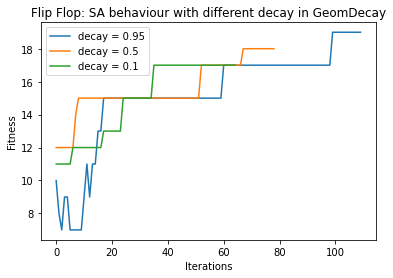

In [56]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SA))),fitness_curve_SA[...,0],'-',label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_GD2))),fitness_curve_GD2[...,0],'-',label='decay = 0.5')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GD3))),fitness_curve_GD3[...,0],'-',label='decay = 0.1')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Flip Flop: SA behaviour with different decay in GeomDecay")  # Add a title to the axes.
ax.legend()  # Add a legend.

## genetic algorithm

In [16]:
# Solve using genetic algorithm
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, curve=True,
                                              random_state = 1)
print(best_state_GA)
print(best_fitness_GA)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
19.0


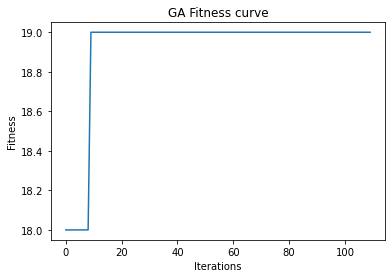

In [17]:
plt.plot(range(0,len(list(fitness_curve_GA))),fitness_curve_GA[...,0],'-')
plt.title("GA Fitness curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()

In [18]:
best_state_GA100, best_fitness_GA100, fitness_curve_GA100 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=100,
                                                                         max_attempts = 100, curve=True,random_state = 2)
best_state_GA300, best_fitness_GA300, fitness_curve_GA300 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=300,
                                                                         max_attempts = 100, curve=True,random_state = 3)

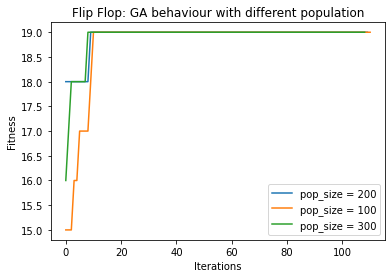

In [19]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_GA))),fitness_curve_GA[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_GA100))),fitness_curve_GA100[...,0],'-',label='pop_size = 100')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA300))),fitness_curve_GA300[...,0],'-',label='pop_size = 300')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Flip Flop: GA behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [20]:
# 200 wins

## mimic

In [21]:
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem_no_fit, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=1)

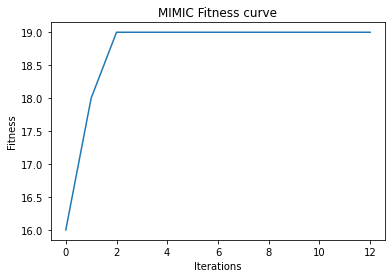

In [22]:
plt.plot(range(0,len(list(fitness_curve_mimic))),fitness_curve_mimic[...,0],'-')
plt.title("MIMIC Fitness curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()

In [23]:
best_state_mimic100, best_fitness_mimic100, fitness_curve_mimic100 = mlrose_hiive.mimic(problem_no_fit, pop_size=100, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=2)
best_state_mimic300, best_fitness_mimic300, fitness_curve_mimic300 = mlrose_hiive.mimic(problem_no_fit, pop_size=300, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=33)

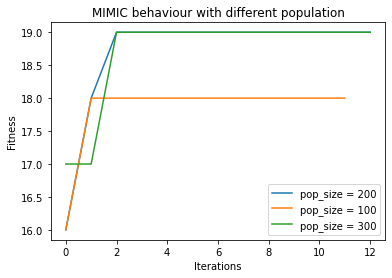

In [24]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_mimic))),fitness_curve_mimic[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_mimic100))),fitness_curve_mimic100[...,0],'-',label='pop_size = 100')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_mimic300))),fitness_curve_mimic300[...,0],'-',label='pop_size = 300')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [25]:
# 300 wins

## Conclusion

In [26]:
print(best_fitness_HC10)
print(best_fitness_SAarith3)
print(best_fitness_GA300)
print(best_fitness_mimic300)

16.0


NameError: name 'best_fitness_SAarith3' is not defined

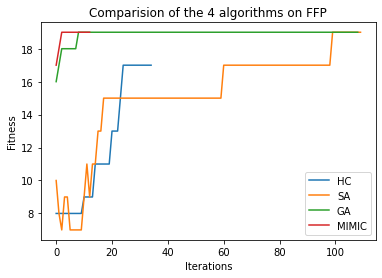

In [59]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_HC10))),fitness_curve_HC10[...,0],'-',label='HC')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SA))),fitness_curve_SA[...,0],'-',label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA300))),fitness_curve_GA300[...,0],'-',label='GA')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_mimic300))),fitness_curve_mimic300[...,0],'-',label='MIMIC')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Comparision of the 4 algorithms on FFP")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [60]:
startHC10 = time.time()
best_state_HC10, best_fitness_HC10, fitness_curve_HC10 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=10, 
                                                                         init_state=None, curve=True, random_state=42)
endHC10 = time.time()
HC10time = endHC10 - startHC10
print(HC10time)

0.016001462936401367


In [61]:
startSAarith3 = time.time()
schedule_SA = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose_hiive.simulated_annealing(problem_no_fit, schedule=schedule_SA, 
                                                                              max_attempts=10, max_iters=1000, init_state=None, 
                                                                              curve=True, random_state=42)
endSAarith3 = time.time()
SAarith3 = endSAarith3 - startSAarith3
print(SAarith3)

0.01600956916809082


In [62]:
startGA = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, curve=True,
                                              random_state = 2)
endGA = time.time()
GA = endGA - startGA
print(GA)

0.9237351417541504


In [63]:
startMIMIC = time.time()
best_state_mimic300, best_fitness_mimic300, fitness_curve_mimic300 = mlrose_hiive.mimic(problem_no_fit, pop_size=300, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=3)
endMIMIC = time.time()
MIMIC = endMIMIC - startMIMIC
print(MIMIC)

2.1865932941436768


In [64]:
runtime_list = [HC10time,SAarith3,GA,MIMIC]
print(runtime_list)
names = ["Randomized Hill Climing", "SA","GA","MIMIC"]
print(names)

[0.016001462936401367, 0.01600956916809082, 0.9237351417541504, 2.1865932941436768]
['Randomized Hill Climing', 'SA', 'GA', 'MIMIC']


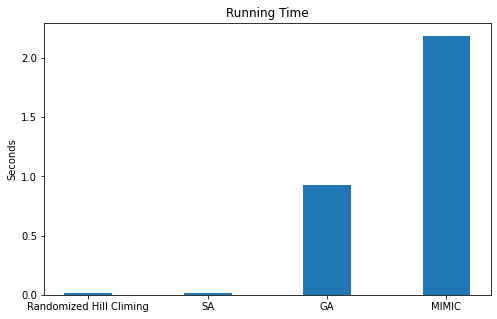

In [66]:

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(names,runtime_list, width = 0.4)
plt.ylabel("Seconds")
plt.title("Running Time")
plt.show()